## `19IT031 Aman Desai`
## Practical - 5 `Comparative analysis of models using quantitative measures`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

## RMSE, Mean square error, root absolute error, r2 score

In [2]:
linear_regg_dataset = pd.read_csv('car data.csv')
linear_regg_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# encoding "Fuel_Type" Column
linear_regg_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
linear_regg_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
linear_regg_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

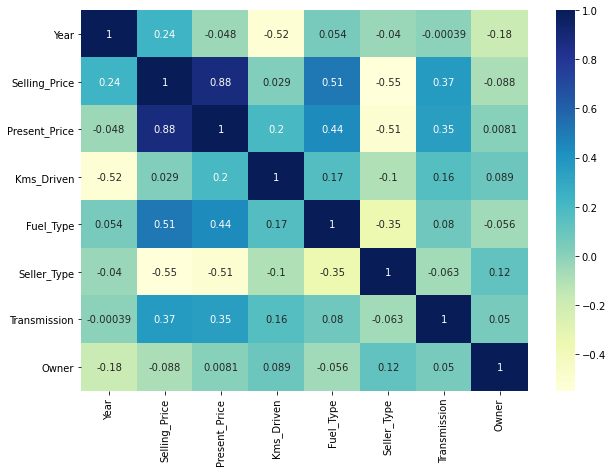

In [4]:
plt.figure(figsize = (10,7))
sns.heatmap(linear_regg_dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(linear_regg_dataset['Present_Price'])
Y = pd.DataFrame(linear_regg_dataset['Selling_Price'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

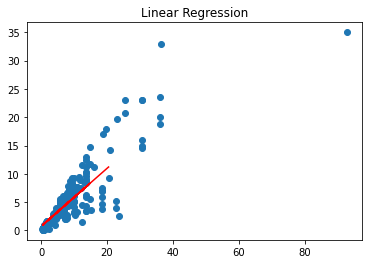

In [6]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

plt.title("Linear Regression")
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, 'r')
plt.show()

In [7]:
def printPerformance(y, y_pred):
    RMSE = sqrt(mean_squared_error(y, y_pred))
    MAE = mean_absolute_error(y, y_pred)
    SSE = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    print("Root mean square: ", RMSE)
    print("Root Absolute error: ", MAE)
    print("mean squared: ", SSE)
    print("r2 score: ", r2)

In [8]:
printPerformance(y_test, y_pred)
print("Accuracy: ",lr_model.score(y_test, y_pred))

Root mean square:  1.2938162578416226
Root Absolute error:  0.9652980360414524
mean squared:  1.6739605090552998
r2 score:  0.8727685263353028
Accuracy:  0.6856949109664496


## Logistic regression (Binary classification)

## Accuracy, ROC AUC report, log loss

In [9]:
logistic_regg_dataset = pd.read_csv('suv_data.csv')
logistic_regg_dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
logistic_regg_dataset.drop('User ID', axis=1, inplace=True)
logistic_regg_dataset.loc[logistic_regg_dataset.Gender == 'Male', 'Gender'] = 1
logistic_regg_dataset.loc[logistic_regg_dataset.Gender == 'Female', 'Gender'] = 0

X = logistic_regg_dataset.drop('Purchased', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = logistic_regg_dataset.Purchased

#Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

y_pred = logreg_model.predict(x_test)

In [11]:
def printClassPerformance(y, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    acc_score = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)
    auc = roc_auc_score(y, y_pred)
    logloss = log_loss(y, y_pred)
    
    sns.heatmap(cm, cmap="YlGnBu", annot = True)
    plt.show()
    print("Accuracy: ", acc_score)
    print("Report: ", report)
    print("ROC AUC Report: ", auc)
    print("log loss: ", logloss)

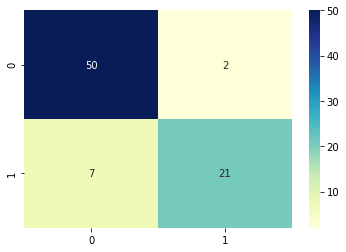

Accuracy:  0.8875
Report:                precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

ROC AUC Report:  0.8557692307692307
log loss:  3.885632334363207


In [12]:
printClassPerformance(y_test, y_pred)

Here we have done comparative analysis based on different performance parameters

## Conclusion

* In conclusion, performance measurement plays an essential role in creating public value
through effective strategic management. The work of developing and improving
performance measurement systems involves philosophical and normative as well as
scientific and cognitive issues.


* A confusion matrix is a remarkable approach for evaluating a classification model. It
provides accurate insight into how correctly the model has classified the classes depending
upon the data fed or how the classes are misclassified.


* RMSE is the standard deviation of the errors which occur when a prediction is made on a
dataset. This is the same as MSE (Mean Squared Error) but the root of the value is
considered while determining the accuracy of the model.